In [2]:
import pandas as pd
import numpy as np
import sklearn.svm as svm
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Autoencoder 2017 Dataset.csv")
df = df[df["Fraud"].notnull()].copy()
df = df.fillna(0)

df2 = df.iloc[:-5,:].copy()
df2 = df2.iloc[20:,:].copy()
X = df2.iloc[:,1:].copy()
y = df2.iloc[:,0]
validation_set_neg = df.iloc[:20,1:].copy()
validation_set_pos = df.iloc[-5:,1:].copy()

In [6]:
pres = []
recall = []
for i in np.arange(0.0001, 0.01, 0.0001):
    model = svm.SVC(C = i, class_weight = "balanced", gamma = 'scale')
    model.fit(X, y)
    pred_n = model.predict(validation_set_neg)
    pred_p = model.predict(validation_set_pos)
    if sum(pred_p) + sum(pred_n) > 0:
        pres.append(sum(pred_p)/(sum(pred_p) + sum(pred_n)))
        recall.append(sum(pred_p)/len(pred_p))
total = [pres[i] + recall[i] for i in range(len(pres))]
print(recall[np.argmax(total)], pres[np.argmax(total)])
# plt.plot(recall, pres)

0.0 0.0


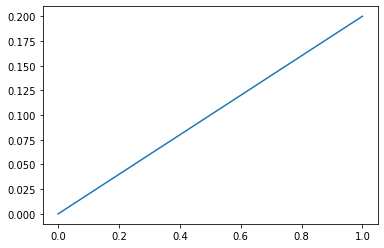

In [19]:
plt.plot(recall, pres)

0.4 1.0


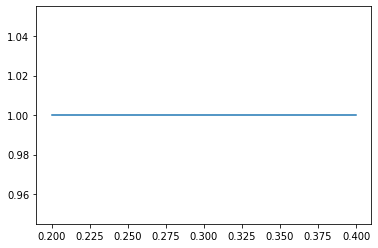

In [20]:
import warnings
warnings.filterwarnings('ignore')
pres = []
recall = []
for i in np.arange(0.0001, 0.01, 0.0001):
    model = svm.LinearSVC(C = i, penalty = 'l1', loss = 'squared_hinge', class_weight = "balanced", dual = False)
    model.fit(X, y)
    pred_n = model.predict(validation_set_neg)
    pred_p = model.predict(validation_set_pos)
    if sum(pred_p) + sum(pred_n) > 0:
        pres.append(sum(pred_p)/(sum(pred_p) + sum(pred_n)))
        recall.append(sum(pred_p)/len(pred_p))
total = [pres[i] + recall[i] for i in range(len(pres))]
print(recall[np.argmax(total)], pres[np.argmax(total)])
plt.plot(recall, pres)

0.2 1.0


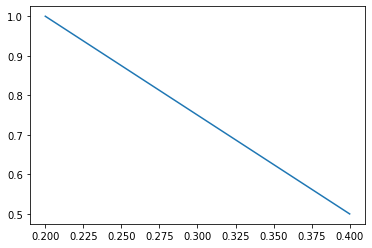

In [21]:
pres = []
recall = []
for i in np.arange(0.0001, 0.001, 0.0001):
    model = svm.NuSVC(nu = i, class_weight = "balanced", gamma = 'scale')
    model.fit(X, y)
    pred_n = model.predict(validation_set_neg)
    pred_p = model.predict(validation_set_pos)
    if sum(pred_p) + sum(pred_n) > 0:
        recall.append(sum(pred_p)/len(pred_p))
        pres.append(sum(pred_p)/(sum(pred_p) + sum(pred_n)))

plt.plot(recall, pres)
total = [pres[i] + recall[i] for i in range(len(pres))]
print(recall[np.argmax(total)], pres[np.argmax(total)])

In [22]:
# Unsupervised outlier detection with both types of entries
model = svm.OneClassSVM(gamma = 'scale')
model.fit(X)
pred_n = model.predict(validation_set_neg)
pred_p = model.predict(validation_set_pos)
recall = sum([1 for i in pred_p if i == -1])/len(pred_p)
pres = sum([1 for i in pred_p if i == -1])/(sum([1 for i in pred_p if i == -1]) + sum([1 for i in pred_n if i == -1]))
print(recall, pres)

0.4 0.2222222222222222


In [23]:
# Unsupervised outlier detection with only non-fraud entries
df3 = df[df["Fraud"] != 1].copy()
df4 = df3.iloc[21:,:]
X1 = df4.iloc[:,1:].copy()
validation_set_neg = df3.iloc[:21,1:].copy()
validation_set_pos = df[df["Fraud"] == 1].iloc[:,1:].copy()
model = svm.OneClassSVM(gamma = 'scale')
model.fit(X1)
pred_n = model.predict(validation_set_neg)
pred_p = model.predict(validation_set_pos)
print(pred_n)
recall = sum([1 for i in pred_p if i == -1])/len(pred_p)
pres = sum([1 for i in pred_p if i == -1])/(sum([1 for i in pred_p if i == -1]) + sum([1 for i in pred_n if i == -1]))
print(recall, pres)

[ 1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1]
0.7619047619047619 0.7272727272727273


In [7]:
X.shape

(1931, 367)